<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/09_SkimLit_nlp_milestone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MileStone Project 2: SkimLit📃🔥

The purpose of this notebook is to build an NLP model to make reading medical abstacts easier.

The paper we're replicating (the source of the dataset that we'll be using **PubMed 200k RCT**) is available here: https://arxiv.org/abs/1710.06071

And reading throughn the paper above, we see that the model architecture (**Neural Networks for Joint Sentence Classification in Medical Paper Abstracts**) that they used to achieve the best result is here: https://arxiv.org/abs/1612.05251

If you want to find the ground truth for this notebook (with lots of diagram and text annotation) see the github: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb

## Confirm access to GPU

In [1]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Get the data

Since we'll be relicating the paper above (PubMed 200k RCT), Let's download the datset they used.

We can do so from Authers GitHub: https://github.com/Franck-Dernoncourt/pubmed-rct

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 37.78 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [3]:
# Check what files are in the PubMed_20k Dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [4]:
# Start ou experiment using the 20k dataset with numbers replaced by "@" sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
import os
os.listdir(data_dir)

['test.txt', 'train.txt', 'dev.txt']

In [6]:
# Check all of the filename in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Preprocess data

Now we've got some text data, it's time to become one with it.

And one of the best ways to become one with data is to...

> Visualize, visualize, visualize

Let's write a function to read in all of the lines of a target text file.

In [7]:
# Create a function to read the line of a document
def get_lines(filename):
  """
  Reads filename (a text filename) and returns the lines of text as a lists.

  Args:
    filename:  a string containing the target filepath.

  Returns:
    A List of strings with one string per line from the target filename.
  """

  # with is simialr to try/finally
  with open(filename, "r") as f:
    return f.readlines()

In [8]:
# Let's read in the training lines
train_lines = get_lines(data_dir + "train.txt") # read the line for training file
train_lines[:28]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
len(train_lines)

210040

In [10]:
len('CONCLUSIONS\t')

12

In [11]:
a = [1, 2, 3, 4, 5]

In [12]:
for i  in range(3):
  print(a[-i-1])

5
4
3


Let's think about how we want our data to look.

How I think our data would be represented?

```
[
  {
    'line_number': 0,
    'target': 'BACKGROUND',
    'text': Emotional eating is associated with overeating and the development of obesity .\n',
    'total_lines': 11
  },
  ...
]
```

In [13]:
# My own logic: correct
# But exceed our Cpu limit. our time complexity seems to be shit
# seem like i misunderstood line number but its alright

abstract_number = -1
list_of_dic = []
dic_to_be_added = {}
total_lines = -1

for i in train_lines[:28]:

  if ( i[:3] == '###'):
    abstract_number += 1


    continue
  if (i == '\n'):
    for j in range(total_lines + 1): # for updating total_lines values
      list_of_dic[-1-j]["total_lines"] = total_lines

    total_lines = -1
    continue

  total_lines += 1

  if (i[:11] == 'BACKGROUND\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'BACKGROUND'
    dic_to_be_added["text"] = i[11:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue
    # print(i[11:-1])

  if (i[:10] == 'OBJECTIVE\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'OBJECTIVE'
    dic_to_be_added["text"] = i[10:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue

  if (i[:8] == 'METHODS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'METHODS'
    dic_to_be_added["text"] = i[8:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue


  if (i[:8] == 'RESULTS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'RESULTS'
    dic_to_be_added["text"] = i[8:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue

  if (i[:12] == 'CONCLUSIONS\t'):
    dic_to_be_added["abstract_number"] = abstract_number
    dic_to_be_added["target"] = 'CONCLUSIONS'
    dic_to_be_added["text"] = i[12:-1]
    list_of_dic.append(dic_to_be_added)
    dic_to_be_added = {}
    continue


print(list_of_dic)

[{'abstract_number': 0, 'target': 'OBJECTIVE', 'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .', 'total_lines': 11}, {'abstract_number': 0, 'target': 'METHODS', 'text': 'Secondary outcome measures included the Wester

In [14]:
len(list_of_dic)

23

In [15]:
import pandas as pd
list_of_dic_df = pd.DataFrame(list_of_dic)
list_of_dic_df

,abstract_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,0,METHODS,A total of @ patients with primary knee OA wer...,11
2,0,METHODS,Outcome measures included pain reduction and i...,11
3,0,METHODS,Pain was assessed using the visual analog pain...,11
4,0,METHODS,Secondary outcome measures included the Wester...,11
5,0,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",11
6,0,RESULTS,There was a clinically relevant reduction in t...,11
7,0,RESULTS,The mean difference between treatment arms ( @...,11
8,0,RESULTS,"Further , there was a clinically relevant redu...",11
9,0,RESULTS,These differences remained significant at @ we...,11


In [16]:
a='aa\n'
a.isspace()

False

In [17]:
a='\n'
a.isspace()

True

In [18]:
# Dbruke logic

# very important to look at the train_lines in above to visualize the data and how it is formatted
def preprocess_text_with_line_numbers(filename):
  """
  Return a list of dictionaries of abstract line data.

  Takes in filename, reads it contents and sort through each line,
  extracting things like the target label, the text of sentence,
  how many sentences are in the current abstract and what sentence number the target line is.
  """

  input_lines = get_lines(filename) # get all lines from filename

  # abstract are separated by '/n' and '###24293578\n'
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create and empty list of abstracts

  # Loop through each line in the target file
  for line in input_lines:

    # at the start of each abstract
    if line.startswith("###"): # check to see if the line is an ID line
      abstract_id = line
      abstract_lines = "" # reset the abstract string if the line is an ID line


    # the end of each abstract: we know we have '\n' at the end of each abstract (1 abstract: whole collection of background, methond, objective...)
    # elif line == '\n'
    elif line.isspace(): # means is it '\n' # check if the line is new line. if we reach end of the each line_number
      # now we again split line for each background, objective...
      # return list of each list
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines or it won string like ['hello i am Rajeeb', "todayis good day']"

      # Iterate thorugh each line in a single abstract and count them at the same time.
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create an empty dictionary for each line
        target_text_split = abstract_line.split("\t") # split target label from text eg: [objective\tHello] ---> [objective, Hello]
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it # probably no need for lower for do it anyway.
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract
        line_data["total_lines"]  = len(abstract_line_split)-1 # how many total lines are there in target abstract (start from 0 i.e - 1)
        abstract_samples.append(line_data) # add line data to abstract sample list

    # if we are in BACKGROUND, or OBJECTIVE, OR REUSLTS .... (not at the start of abstract (###) or end ('\n') )
    else: # if the above condition aren't fulfilled the line contains a labelled sentence
      abstract_lines += line # adding whole element to abstract_lines so it can be formatted later in above elif condition when we reach the end of abstrac

  return abstract_samples


In [19]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # another txt file
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

len(train_samples), len(val_samples), len(test_samples)

CPU times: user 715 ms, sys: 155 ms, total: 869 ms
Wall time: 1.38 s


(180040, 30212, 30135)

In [20]:
# Check the first abstract of our training data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Now that our data is the format of a list of dictionaries, how about we turn it into a DataGram to further visualize it.

In [21]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)


,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [22]:
# Distribution of labels in training data
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

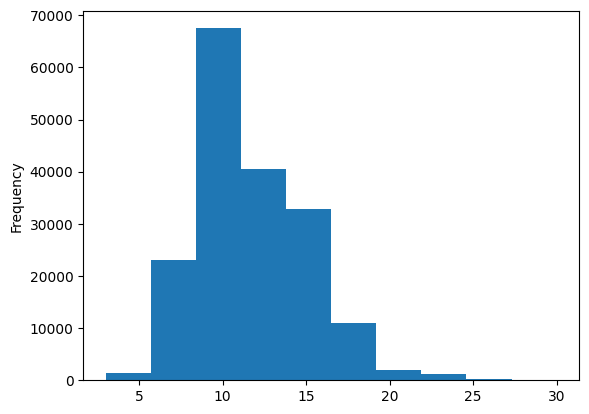

In [23]:
# Let's check the length of different lines
train_df.total_lines.plot.hist();

### Get lists of sentences

In [24]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [25]:
# View the 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make numeric labels (ML models require labels)

In [26]:
# # One hot encode labels
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False) # we want non-sparse matrix
# train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy()) # sure: shape error got 1D but needed 2D

# # Check out our one hot encoded labels
# train_labels_one_hot

In [27]:
# One hot encode labels of train data
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) # we want non-sparse matrix as tensorflow is incompatible with sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check out our one hot encoded labels
train_labels_one_hot[:10], val_labels_one_hot[:10], test_labels_one_hot[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]))

In [28]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

### Labels: encode Labels

In [29]:
# Extract label {"target" columns} and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_label_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check out training labels
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [30]:
# Get class names and number of classes from label encoder instances
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names


(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting a series of modelling experiments...

As usual, we're going to be trying our a bunch of different models and seeing which one works bes.

And as always, we're going to start with a baseline (TF-IDF multinomial Naive Bayes Classifier).

Great resources and teacher: https://chrisalbon.com/Home

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features or vectors.
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling Pipeline
model_0 = Pipeline([
    # Tuple
    ("tfidf", TfidfVectorizer()), # Convert words to number using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, y=train_labels_encoded) # multinomialNB doesnot support one hot encoded, just label encoder

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
baseline_score = model_0.score(val_sentences, val_labels_encoded)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 72.18%


In [33]:
# Make predictions using our baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

### Download helper function script

In previous module, we wrote a function to compare prediction accross different matrics (accuracy, precision, recall, f1) and rather than rewriting it here, let's download it from helper function:
https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-13 16:23:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-13 16:23:07 (58.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [35]:
from helper_functions import calculate_results

In [36]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [37]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Preparin our data (the text) for deep sequence models

Before we start building deeper model, we've go to create vectorization and embedding layers.

In [38]:
import numpy as np
import tensorflow as tf

In [39]:
# Each sentence length
sent_lens=[len(i.split()) for i in train_sentences]

# How long is each senctences in average
avg_sent_len = np.mean(sent_lens)
avg_sent_len
# seem no of token or words is 26

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

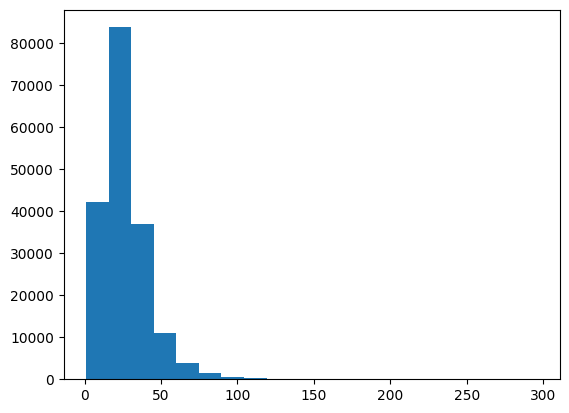

In [40]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

# vast majority of sentences are under 50 words

In [41]:
# How long of a sentences length coers 95% of examples? how long our max_lenght should be so it covers most of the sentences
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

# This is saying 95% of sentences are under 55

55

In [42]:
# Max sequence length in the training set
max(sent_lens)
# ridiculous to set max_length to 296
# best is 55 for performance without losing accuracy

296

### Crreating text vectorizer layer

Map our text from words to numbers.

In [43]:
from tensorflow.keras.layers import TextVectorization

In [44]:
# use the default TextVectorization parameters
# This is only the default bu we will modify later here.
#max_token=10000 means only 10000 most common word
text_vectorizer = TextVectorization(max_tokens=None, # How many words in our vocabulary: None: no limit ( automaically add <00V>)
                                    standardize = 'lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # n-words:join splitted words before tokenizaion. None:each word, each token
                                    output_mode='int', # how to map token to token. here int but can be specific function like tf_idf
                                    #How long do we want our sequence to be : 50 ,100, None..
                                    #automatially set sequence to longest sequence or tweet lenght. add zero ad end for short tweets
                                    output_sequence_length=None, # Batch need to same length. Eg here Each Tweet length are different
                                    # aadd zero ad end for short tweets to match (output_sequence_length: none: means longest one)
                                    pad_to_max_tokens=False #if true reult in shape (Batch_size, Max_tokesn)
                                    )

In [45]:
# Setup text Vectorization variable
max_vocab_length = 68000 # max number of words  to have in our vocabulary #
# 15 from round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length= output_seq_len # desired output length of vectorized sequence # we got 55 above: look

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens=True,
                                    )

In [46]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [47]:
# Create our own sample sentences and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[43871,     8,     1,     5, 25624, 10148,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [48]:
import random
# Choose  a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"The length of random sentence: {len(random_sentence)}")
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

The length of random sentence: 128
Original text:
 the eeg laterality coefficients from the therapy part of the tdcs group were significantly higher than those of the sham group .      

Vectorized version:


<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[    2,  3122, 20303,  3452,    27,     2,    66,   732,     4,
            2,  1750,    13,     9,    39,    82,    42,   125,     4,
            2,   786,    13,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [49]:
# part of Exploration of data: one with the data
# How unique words from vocabulary we found in our train_sentence
# if Max_token: None as hyperparameter : automatically set no of words_in_vocab to each Unique word
# if Max_token: 10000 like we did : words_in_vocab will be 100000
rct_20k_text_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our train_data
top_5_words = rct_20k_text_vocab[:5] # get the most common words
bottom_5_words = rct_20k_text_vocab[-5:] # get the least common words

print(f"Number of words in vocab in train_data: {len(rct_20k_text_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

#[UNK] means unkown: 10000 words may be small but its ok here

Number of words in vocab in train_data: 64841
5 most common words: ['', '[UNK]', 'the', 'and', 'of']
5 least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


### Creating a embedding

In [50]:
from tensorflow.keras import layers

token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab), # set the input shape,: 68000
                              output_dim = 128, # Neural network especially that using GPU works greate with number divisible by 8 eg. 128. eacg word or token to 128 numerical values
                              input_length = max_length, # how long is each input
                              mask_zero=True, # use masking to handle variable sequence length # just making sure for shape error # efficient computing if lots of zero
                              name='token_embedding'
                              )
token_embed

In [51]:
# for visualizaion only one random sentence

# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\n\n")

# Embed the random sentence (turn it into dense vector of fixed size)
sample_embed = token_embed(text_vectorizer([random_sentence]))
print(f"Sentence after embedding:\n {sample_embed}\n\n")
print(f"Shape of embedded sentence: {sample_embed.shape}")

Original text:
 pooled data from both treatment groups showed a significant decrease in bmi sd score of @ units and a significant decrease in parent-reported and self-reported strength and difficulty questionnaire total score of @ units .


Sentence after embedding:
 [[[-0.03154664 -0.01448639  0.02953434 ... -0.01507654 -0.03734257
    0.01742257]
  [-0.00031411  0.00752087 -0.00883322 ... -0.01690944 -0.01843262
   -0.00104817]
  [-0.03783726  0.00581353 -0.04616947 ... -0.00205252  0.00074514
    0.03281679]
  ...
  [-0.02277984 -0.02255322 -0.03529133 ... -0.04819499  0.04517848
   -0.02153148]
  [-0.02277984 -0.02255322 -0.03529133 ... -0.04819499  0.04517848
   -0.02153148]
  [-0.02277984 -0.02255322 -0.03529133 ... -0.04819499  0.04517848
   -0.02153148]]]


Shape of embedded sentence: (1, 55, 128)


In [52]:
# Check out a single token's embedding for the first word of our sentence e.g. the
print(f"Original text:\n {random_sentence}\n\n")
print(f"First word :\n {random_sentence.split(' ', 1)[0]}\n\n")
print(f" Embedding values of single First word ({random_sentence.split(' ', 1)[0]}) in sentences are: {sample_embed[0][0]}\n\n")
print(f"Shape of each word (here word: {random_sentence.split(' ', 1)[0]}) is: {sample_embed[0][0].shape}")

Original text:
 pooled data from both treatment groups showed a significant decrease in bmi sd score of @ units and a significant decrease in parent-reported and self-reported strength and difficulty questionnaire total score of @ units .


First word :
 pooled


 Embedding values of single First word (pooled) in sentences are: [-3.15466411e-02 -1.44863948e-02  2.95343436e-02  3.94743569e-02
 -2.92887222e-02  4.13898490e-02  4.57703806e-02 -1.49877295e-02
  4.92688678e-02 -4.47102301e-02  3.16500403e-02 -4.65525053e-02
 -5.97957522e-03  5.73138148e-03 -4.24066074e-02 -2.30433345e-02
 -3.18823010e-02  1.27223879e-03 -5.91940805e-03 -5.38849831e-03
  4.22341563e-02  9.45720822e-03 -4.35325764e-02  4.21432592e-02
 -3.22782546e-02  1.31472982e-02 -1.64734200e-03  2.41993330e-02
  1.57675035e-02 -2.46069916e-02  1.83941238e-02 -3.73236313e-02
  1.85755752e-02 -2.46182326e-02  9.28312540e-03  4.94345762e-02
  4.84983586e-02  5.21517918e-03 -7.77901337e-03  3.68855149e-03
 -2.17797291e-02  2.

## Creating dataset (making sure our data loads as fast as possible)

`We must do it for every good machine learning project so must read: https://www.tensorflow.org/guide/data_performance`

We're going to setup our data to run as fast as possible with the TensorFlow tf.data API, many of the steps here are discussed at length in these two resources:
* https://www.tensorflow.org/guide/data_performance
* https://www.tensorflow.org/guide/data

In [53]:
# Turn our data in TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot)) #(one_hot or label encoded both good). Here one hot beacuase we want feature like (may be getting probabilities while .predict ) we want to use on loss function that wont work on label encoded
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [54]:
train_labels_one_hot.shape, train_labels_one_hot[0] # above 5 in TensorSpec(shape=(5,) came from here

((180040, 5), array([0., 0., 0., 1., 0.]))

In [55]:
# Take the TensorSliceDataset's and turn them into prefetched datasets

# Very imp: We don't shuffle or dataset here: because order of dataset is very very importand.
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # automatically prefetch any many as you can
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D with token embeddings

In [56]:
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [57]:
# Build our Conv1D model to process sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
print(token_embeddings.shape)



x = layers.Conv1D(filters=64, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time
                  strides=1,
                  activation='relu',
                  padding='same')(token_embeddings) # padding will compress input like 15 to 13 if 'valid' (default). if 'same' no-compression
print(x.shape)

x = layers.GlobalMaxPool1D()(x) # Max Pool seems to be better for this data.
print(x.shape)

# x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(num_classes, activation="softmax")(x) # num_classes = 5 # number of our ouptut
print(outputs.shape)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv1D')

(None, 55, 128)
(None, 55, 64)
(None, 64)
(None, 5)


In [58]:
# Compile  Conv1D
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary()
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                    

In [59]:
len(train_dataset) *32 # seems like very big datset

180064

In [60]:
# # It is imp for creating tensorboard callback if we are expreimenting with different model
# # Create a tensorboard callback (need to create a new one of each model)
# from helper_functions import  create_tensorboard_callback

# # Create a directory to save TensorBoard logs
# SAVE_DIR = "model_logs"

In [61]:
# Fit the model
# faster experiment by reducing data to 10% by steps_per_epoch helps us to get know what doenot work and what does work
history_model_1 = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)), # dataset is very big: 180064 so we want 10% of batches of data for faster training
                              epochs=3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1 * len(valid_dataset)) # validation on only 10% of batches of  data
                              )

Epoch 1/3
562/562 [==============================] - 81s 141ms/step - loss: 0.8295 - accuracy: 0.6919 - val_loss: 0.5826 - val_accuracy: 0.7879
Epoch 2/3
562/562 [==============================] - 95s 169ms/step - loss: 0.5765 - accuracy: 0.7874 - val_loss: 0.5417 - val_accuracy: 0.8029
Epoch 3/3
562/562 [==============================] - 92s 164ms/step - loss: 0.5459 - accuracy: 0.7989 - val_loss: 0.5209 - val_accuracy: 0.8062


In [62]:
# Evaluate on whole validation dataset
model_1.evaluate(valid_dataset)

945/945 [==============================] - 9s 9ms/step - loss: 0.5241 - accuracy: 0.8041


[0.5240955948829651, 0.8040844798088074]

In [63]:
# Make predictions (our model predicts prediction preobabilities of each classes)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 7s 7ms/step


(array([[5.8152127e-01, 1.0580061e-01, 2.5083772e-03, 3.0232784e-01,
         7.8418572e-03],
        [2.4891368e-01, 5.5121934e-01, 7.1742653e-04, 1.9575301e-01,
         3.3965013e-03],
        [1.0815928e-01, 7.7840416e-03, 2.5470064e-03, 8.8126385e-01,
         2.4571776e-04],
        ...,
        [2.6436403e-04, 2.4922404e-03, 1.3922120e-02, 1.7269906e-04,
         9.8314857e-01],
        [1.6134566e-02, 5.3547949e-01, 3.6323387e-02, 1.2927985e-02,
         3.9913452e-01],
        [1.8130271e-02, 9.7219729e-01, 2.0724044e-03, 3.2514178e-03,
         4.3486604e-03]], dtype=float32),
 (30212, 5))

In [64]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [65]:
# Calculate model_1 results
model_1_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_1_preds)
model_1_results
 # seems like our model_1 is better than baseline: probably use to larger output_sequence length for each sentences here: 55

{'accuracy': 80.40844697471204,
 'precision': 0.8026786804897196,
 'recall': 0.8040844697471203,
 'f1': 0.802669022985119}

In [66]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Feature Extraction with pretrained token embeddings

* tranfer learning is very powerful

- In Paper They are using old pretrained model likes GloVe embeddings: https://nlp.stanford.edu/projects/glove/
- But we will use another modern model from Tensorflow Hub

In [67]:
import tensorflow_hub as hub

print(sample_sentence)
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")
embed_samples = embed([sample_sentence])
print(embed_samples.shape)

There's a flood in my street!
(1, 512)


In [68]:
# Create a keras layer using the USE pretrained layer from  tensorflow hub

# turn the link into layer
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",

                                        # Previously we had to limit the input but here we don't need to do that
                                        #The input is variable length English text so input can be variable length. (documentaion of universal-sentence-encoder in kaggle)
                                        input_shape=[],

                                        dtype=tf.string,
                                        trainable=False, # pretrained weights stay same,
                                        name='USE'
                                        )

In [69]:
# Test out the pretrained embedding on a random sentences
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence =sentence_encoder_layer([random_train_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embeddings: {len(use_embedded_sentence[0])}")
print(f"Shape of sentence embeddings: {use_embedded_sentence[0].shape}")

Random sentence:
 on day @ , the participants consumed a standardized breakfast and lunch ; the respective snack was consumed @-h post-lunch .
Sentence after embedding:
[-0.01566435 -0.00652406 -0.00125517  0.01627326  0.01289022  0.00680369
  0.02186484  0.04961556 -0.0657009   0.05364676  0.01135612 -0.04254761
 -0.00497487  0.04030678 -0.09411047 -0.04561844  0.02321607 -0.03767611
 -0.03301861  0.03478397  0.01573711  0.01126503 -0.08111127 -0.00619716
  0.03962223 -0.02830505  0.04046213 -0.00194566 -0.03819248 -0.0522632 ]

Length of sentence embeddings: 512
Shape of sentence embeddings: (512,)


## Building and Fitting an NLP feature extraction model using pretrained embedding from TensorFlow HUB

In [70]:
inputs = layers.Input(shape=[], dtype='string', name = 'input_layer')# shape =() or shape = [] because shape may be variable length as mention in above sentence_encoder_layer

pretrained_embeddings = sentence_encoder_layer(inputs)
print(pretrained_embeddings.shape)

x = layers.Dense(128, activation='relu')(pretrained_embeddings)
# You could add more layers if you want to

outputs = layers.Dense(num_classes, activation="softmax")(x) # num_classes = 5 # number of our ouptut
print(outputs.shape)

model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name = "model_2_USE_Feature_Extractor" )

(None, 512)
(None, 5)


In [71]:
65664 + 645 # Trainable params

66309

In [72]:
#Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

Model: "model_2_USE_Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [73]:
# Fit the model
# faster experiment by reducing data to 10% by steps_per_epoch helps us to get know what doenot work and what does work
history_model_1 = model_2.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)), # dataset is very big: 180064 so we want 10% of batches of data for faster training
                              epochs=3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1 * len(valid_dataset)) # validation on only 10% of batches of  data
                              )

Epoch 1/3
562/562 [==============================] - 20s 27ms/step - loss: 0.3413 - accuracy: 0.6224 - val_loss: 0.2864 - val_accuracy: 0.6898
Epoch 2/3
562/562 [==============================] - 15s 27ms/step - loss: 0.2747 - accuracy: 0.6929 - val_loss: 0.2694 - val_accuracy: 0.7058
Epoch 3/3
562/562 [==============================] - 17s 30ms/step - loss: 0.2662 - accuracy: 0.7057 - val_loss: 0.2620 - val_accuracy: 0.7171


In [74]:
# Evaluate on the whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 20s 21ms/step - loss: 0.2610 - accuracy: 0.7120


[0.261035293340683, 0.7119687795639038]

In [75]:
# Make prediction with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 12s 12ms/step


array([[4.9449334e-01, 3.5681427e-01, 1.6051972e-03, 1.4032818e-01,
        6.7589642e-03],
       [2.8761679e-01, 6.2292308e-01, 1.6159521e-03, 8.6174227e-02,
        1.6699171e-03],
       [1.3724419e-01, 1.7097078e-01, 1.4411071e-02, 6.3463724e-01,
        4.2736653e-02],
       ...,
       [2.8149039e-04, 4.3007100e-04, 3.4053798e-03, 1.0939603e-04,
        9.9577361e-01],
       [2.7993163e-03, 2.7067631e-02, 1.0990998e-01, 6.9610460e-04,
        8.5952693e-01],
       [1.4814164e-01, 1.6128580e-01, 6.6188800e-01, 2.1689208e-03,
        2.6515737e-02]], dtype=float32)

In [76]:
# Convert pred probs to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [77]:
# Calculate model_1 results
model_2_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_2_preds)
model_2_results
 # seems like our model_2_feature_extractor is worse than baseline(except f1) and model_1: probably due to less parameters (trainable) used than model_1

{'accuracy': 71.19687541374289,
 'precision': 0.7101715545044164,
 'recall': 0.7119687541374289,
 'f1': 0.707178927092024}

In [78]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 3: Conv1D with character embeddings

The paper which we're replicating state they have used a combination of token embeddings and character embeddings.

Previously we've token-level embeddings but we'll need to do similar steps for characters if we want to use char-level embeddings.

### Creating Character-Level tokenizer

In [79]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [80]:
list("hello to you")

['h', 'e', 'l', 'l', 'o', ' ', 't', 'o', ' ', 'y', 'o', 'u']

In [81]:
" ".join(list("hello to you"))

'h e l l o   t o   y o u'

In [82]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [83]:
# Make Function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Text spliting non-character-level sequences into characters
split_chars(random_train_sentence)

'o n   d a y   @   ,   t h e   p a r t i c i p a n t s   c o n s u m e d   a   s t a n d a r d i z e d   b r e a k f a s t   a n d   l u n c h   ;   t h e   r e s p e c t i v e   s n a c k   w a s   c o n s u m e d   @ - h   p o s t - l u n c h   .'

In [84]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [85]:
# what's the average character length (before the split)
char_lens = [len(sentences) for sentences in train_sentences]
mean_char_lens = np.mean(char_lens)
mean_char_lens

149.3662574983337

(array([2.2108e+04, 7.0583e+04, 5.3952e+04, 2.2391e+04, 7.4540e+03,
        2.2350e+03, 8.0200e+02, 2.8700e+02, 1.1800e+02, 4.9000e+01,
        2.9000e+01, 1.3000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 7.02500e+01, 1.39500e+02, 2.08750e+02, 2.78000e+02,
        3.47250e+02, 4.16500e+02, 4.85750e+02, 5.55000e+02, 6.24250e+02,
        6.93500e+02, 7.62750e+02, 8.32000e+02, 9.01250e+02, 9.70500e+02,
        1.03975e+03, 1.10900e+03, 1.17825e+03, 1.24750e+03, 1.31675e+03,
        1.38600e+03]),
 <BarContainer object of 20 artists>)

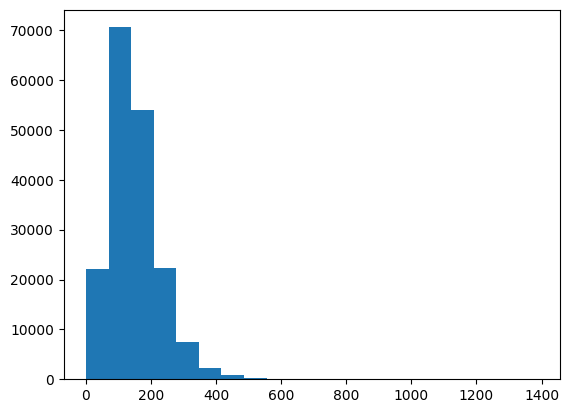

In [86]:
# Check the distribution
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=20)

In [87]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [88]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV token (OOV = out of vocab: '[UNK]') # 26+2 =28
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    #  can be set to None if we don't what stardization if we dont want to remove punctuation
                                    standardize = 'lower_and_strip_punctuation', #Default # make everything lowercase and remove punctuation like @#/!...
                                    name = 'char_vectorizer',
                                    pad_to_max_tokens=True)

In [90]:
# Adapt charcter vectorizer to training character
char_vectorizer.adapt(train_chars)

In [91]:
# Check character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [92]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n {random_train_chars}")
print(f"\nLength of random_train_chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n {vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")
# 290 beacuse we set max_token 290

Charified text:
 a   r a n d o m i z e d   b l i n d e d   p l a c e b o - c o n t r o l l e d   c r o s s o v e r   s t u d y   w a s   c o n d u c t e d   t o   e x a m i n e   t h e   e f f e c t s   o f   t r e a t m e n t   w i t h   p h e n y l b u t a z o n e   ,   m e l o x i c a m   ,   o r   a   p l a c e b o   (   c o n t r o l   s o l u t i o n   )   o n   r e n a l   r e s p o n s e s   t o   t h e   a d m i n i s t r a t i o n   o f   f u r o s e m i d e   ,   d o b u t a m i n e   ,   a n d   e x e r c i s e   (   @   m i n u t e s   a t   @   %   o f   m a x i m u m   h e a r t   r a t e   )   .

Length of random_train_chars: 251

Vectorized chars:
 [[ 5  8  5  6 10  7 15  4 25  2 10 22 12  4  6 10  2 10 14 12  5 11  2 22
   7 11  7  6  3  8  7 12 12  2 10 11  8  7  9  9  7 21  2  8  9  3 16 10
  19 20  5  9 11  7  6 10 16 11  3  2 10  3  7  2 24  5 15  4  6  2  3 13
   2  2 17 17  2 11  3  9  7 17  3  8  2  5  3 15  2  6  3 20  4  3 13 14
  13  2  6 19 12 22 16  3  5 2

### Creating a character-level embedding

In [93]:
from tensorflow.keras import layers

char_embed = layers.Embedding(input_dim = len(char_vocab), # set the input shape,: 28
                              # outout dimension: same as given in fig 1 in https://arxiv.org/pdf/1612.05251.pdf
                              output_dim = 25, # Neural network especially that using GPU works greate with number divisible by 8 eg. 128. eacg word or token to 128 numerical values
                              input_length = NUM_CHAR_TOKENS, # how long is each input
                              mask_zero=True, # use masking to handle variable sequence length # just making sure for shape error # efficient computing if lots of zero
                              name='char_embedding'
                              )
char_embed

In [94]:
# Test our charater embedding layer

# Get a random sentence from the training set
random_train_char= random.choice(train_chars)
print(f"Charified text:\n {random_train_char}\n\n")
print(f"Length of Charified text:\n {len(random_train_char)}\n\n")

# Embed the random sentence (turn it into dense vector of fixed size)
sample_char_embed = char_embed(char_vectorizer([random_train_char]))
print(f"Charified text after embedding:\n {sample_char_embed}\n\n")
print(f"Shape of Embedded Char_sample: {sample_char_embed.shape}")

Charified text:
 r e c r u i t m e n t   t a r g e t s   w e r e   m e t   i n   t h e   i n t e r v e n t i o n   (   @   e n r o l l e d   )   b u t   n o t   i n   c o n t r o l   v i l l a g e s   (   @   e n r o l l e d   )   .


Length of Charified text:
 215


Charified text after embedding:
 [[[-0.0244071  -0.01289337 -0.00808655 ...  0.00768925 -0.01879532
    0.00264109]
  [-0.02007581 -0.03283103  0.04106324 ...  0.04154317  0.00817062
    0.04571501]
  [ 0.01496179  0.0019346  -0.00363263 ...  0.04740144 -0.01771158
    0.03168922]
  ...
  [ 0.01367057  0.00513827  0.03146502 ...  0.01172142 -0.04671377
    0.02195725]
  [ 0.01367057  0.00513827  0.03146502 ...  0.01172142 -0.04671377
    0.02195725]
  [ 0.01367057  0.00513827  0.03146502 ...  0.01172142 -0.04671377
    0.02195725]]]


Shape of Embedded Char_sample: (1, 290, 25)


### Building a Conv1D model to fit on character embeddings

In [95]:
# Build our Conv1D model to process sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
character_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(character_vectors)
print(char_embeddings.shape)



x = layers.Conv1D(filters=64, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time # may 5 no good for character level embedding may be use 15 or 20
                  strides=1,
                  activation='relu',
                  padding='same')(char_embeddings) # padding will compress input like 15 to 13 if 'valid' (default). if 'same' no-compression
print(x.shape)

# x = layers.GlobalAveragePooling1D()(x) # Max Pool seems to be better for this data but for experimentation use Average
x = layers.GlobalMaxPool1D()(x) # Max Pool seems to be better for this data
print(x.shape)

# x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(num_classes, activation="softmax")(x) # num_classes = 5 # number of our ouptut
print(outputs.shape)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_conv1D_Char_embedding')

(None, 290, 25)
(None, 290, 64)
(None, 64)
(None, 5)


In [96]:
# Compile  Conv1D
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary()
model_3.summary()

#Seems like very very less trainable patterns than Model1 where we use text level embedding why? because in model1 emebedding lyaer: ouptput dim 128 but here is just 25

Model: "model_3_conv1D_Char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embedding (Embedding)  (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 5

In [97]:
model_1.summary()

Model: "model_1_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                    

In [98]:
# Turn our data in TensorFlow Datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)) #(one_hot or label encoded both good). Here one hot beacuase we want feature we want to use on loss function that wont work on label encoded
valid_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot))

train_char_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [99]:
train_labels_one_hot.shape, train_labels_one_hot[0] # above 5 in TensorSpec(shape=(5,) came from here

((180040, 5), array([0., 0., 0., 1., 0.]))

In [100]:
# Take the TensorSliceDataset's and turn them into prefetched datasets

# Very imp: We don't shuffle or dataset here: because order of dataset is very very importand.
train_char_dataset = train_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # automatically prefetch any many as you can
valid_char_dataset = valid_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = test_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset # (string, label)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [101]:
# Fit the model
# faster experiment by reducing data to 10% by steps_per_epoch helps us to get know what doenot work and what does work
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_dataset)), # dataset is very big: 180064 so we want 10% of batches of data for faster training
                              epochs=3,
                              validation_data = valid_char_dataset,
                              validation_steps = int(0.1 * len(valid_char_dataset)) # validation on only 10% of batches of  data
                              )

Epoch 1/3
562/562 [==============================] - 13s 21ms/step - loss: 1.2649 - accuracy: 0.4892 - val_loss: 1.0451 - val_accuracy: 0.5941
Epoch 2/3
562/562 [==============================] - 12s 21ms/step - loss: 0.9970 - accuracy: 0.6062 - val_loss: 0.9270 - val_accuracy: 0.6366
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.9130 - accuracy: 0.6458 - val_loss: 0.8527 - val_accuracy: 0.6749


In [102]:
# Evaluation with model_3 with whole validation dataset
model_3.evaluate(valid_char_dataset)

945/945 [==============================] - 6s 7ms/step - loss: 0.8763 - accuracy: 0.6614


[0.8762913346290588, 0.6613597273826599]

In [103]:
# Make prediction with charater model_3
model_3_pred_probs = model_3.predict(valid_char_dataset)
model_3_pred_probs[:10]

945/945 [==============================] - 7s 7ms/step


array([[1.9455217e-01, 4.4033954e-01, 8.8223957e-02, 2.3464677e-01,
        4.2237647e-02],
       [2.9715410e-01, 1.5647215e-01, 9.1151549e-03, 5.3099620e-01,
        6.2624486e-03],
       [1.6716786e-01, 1.8985233e-01, 4.9730733e-02, 5.6437254e-01,
        2.8876608e-02],
       [1.1286393e-02, 1.5332609e-02, 8.5785335e-01, 1.3448172e-02,
        1.0207946e-01],
       [7.7972603e-03, 2.4981299e-02, 6.3652527e-01, 9.1954516e-03,
        3.2150060e-01],
       [5.2712270e-04, 6.3662376e-04, 7.6511556e-01, 4.5752098e-04,
        2.3326313e-01],
       [4.8481552e-03, 9.4527351e-03, 7.7135903e-01, 9.8686917e-03,
        2.0447132e-01],
       [2.5515082e-01, 3.2061449e-01, 8.3386227e-02, 1.6525826e-01,
        1.7559014e-01],
       [2.0820294e-03, 1.2948066e-02, 1.3234486e-01, 6.3758418e-03,
        8.4624904e-01],
       [6.9044046e-02, 2.3438999e-01, 2.5848907e-01, 1.0211004e-01,
        3.3596683e-01]], dtype=float32)

In [104]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 3, 3, ..., 4, 4, 0])>

In [105]:
# Calculate model_1 results
model_3_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_3_preds)
model_3_results
# Worst model yet
# seems like our model_3_charavter_embedding is worse than baseline and model_1 and model_2: probably due to less parameters (trainable) here

{'accuracy': 66.13597246127367,
 'precision': 0.6571971388222556,
 'recall': 0.6613597246127366,
 'f1': 0.6526440538447366}

In [106]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 4: Combining pretrained token embeddings + characters embeddings (hybrid embeddings layer)

1. Create a token-level embedding model (similar `model_1`)
2. Create a  character-level model (similar to `model_3` with a slight modification)
3. Combine 1 and 2 with a concatenate (`layer.Concatenate`)
4. Build a series of output layers on top 3 similar to figure 1 and section Training 4.2 of paper: https://arxiv.org/pdf/1612.05251.pdf
5. Construct a model that token and character level sequence as input and produces sequence label probabilities as output.

In [107]:
# Create a keras layer using the USE pretrained layer from  tensorflow hub

# turn the link into layer
tf_hub_embedding_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",

                                        # Previously we had to limit the input but here we don't need to do that
                                        #The input is variable length English text so input can be variable length. (documentaion of universal-sentence-encoder in kaggle)
                                        input_shape=[],

                                        dtype=tf.string,
                                        trainable=False, # pretrained weights stay same,
                                        name='USE'
                                        )

In [138]:
# 1. Setup token inputs/model
token_inputs = layers.Input (shape=[],dtype=tf.string, name = "token_input")
token_embeddings = tf_hub_embedding_layer (token_inputs)
token_outputs = layers.Dense (128, activation="relu")(token_embeddings)
print(token_outputs.shape)
token_model = tf.keras.Model (inputs = token_inputs,
                             outputs = token_outputs)

# 2.  Setup char inputs/model
char_inputs = layers.Input(shape = (1,),dtype = tf.string, name = "char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors) # 25 was the output dimension we set before
# bidirection so 24 + 24 = 48 output . 24 instead of 25 like in fig1 because multiple of 8 is better for faster runtime
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings) # bi_LSTM shown in fig 1 of https://arxiv.org/pdf/1612.05251.pdf
print(char_bi_lstm.shape)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

# 3. Contcatenate token and char inputs (Create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                 char_model.output])

# 4. Create output layers - adding in Dropout, discussed in section 4.2 of https://arxiv.org/pdf/1612.05251.pdf, nyst see to realize what we are doing here.
# for regularization or overfitting: randomly drops 0.5 learned weights or 50% of input units set to zero randomly At the ends only keep the important weights only
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)

output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)
print(output_layer.shape)

#5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input], # while fitting or creating data pipeline order match this order of inputs
                         outputs = output_layer,
                         name = "model_4_token_and_char_embeddings")


(None, 128)
(None, 48)
(None, 5)


In [140]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 USE (KerasLayer)            (None, 512)                  2567978 

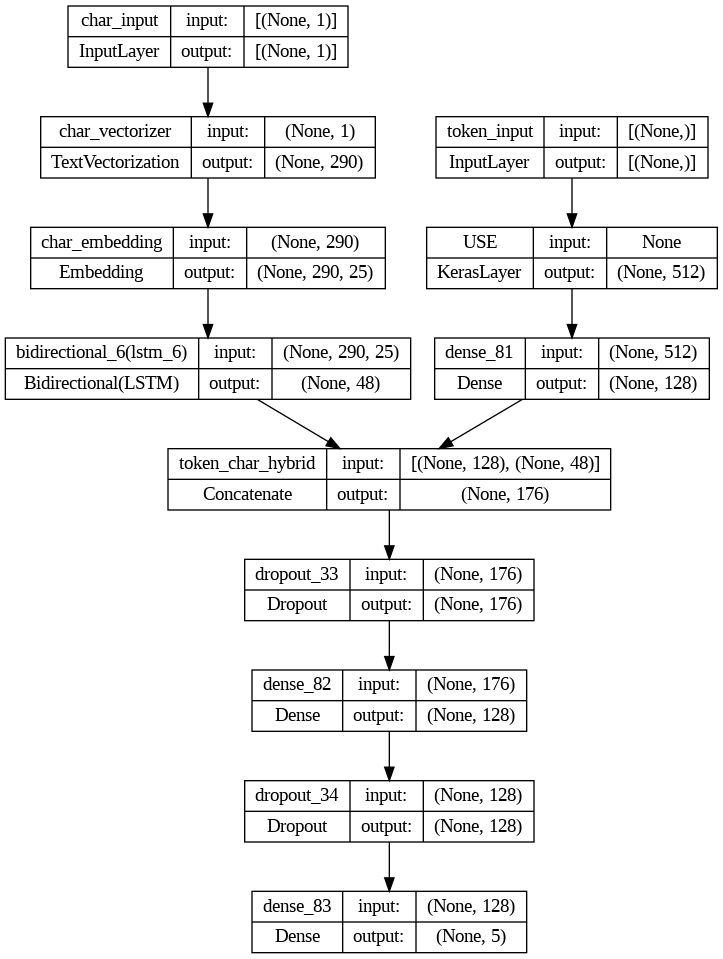

In [146]:
# Plot hybrid token and character model
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

# Tip None means batch size

Amazing paper if we want to learn about combininig different model like above: https://medium.com/airbnb-engineering/widetext-a-multimodal-deep-learning-framework-31ce2565880c

In [154]:
# Compile token Char model
model_4.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(), # section 4.3 of paper says they used SGD but we will use Adam,
                metrics=["accuracy"])

### Combining token and character data into tf.data Dataset

In [148]:
# for training dataset
# Combine chars and tokens into dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make the labels
train_char_token_dataset = tf.data.Dataset.zip(train_char_token_data, train_char_token_labels)# zip combine existing datasets

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [149]:
# for our validation dataset
# Combine chars and tokens into dataset
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot) # make the labels
val_char_token_dataset = tf.data.Dataset.zip(val_char_token_data, val_char_token_labels)# zip combine existing datasets

# Prefetch and batch val data
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [150]:
# for our test dataset
# Combine chars and tokens into dataset
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot) # make the labels
test_char_token_dataset = tf.data.Dataset.zip(test_char_token_data, test_char_token_labels)# zip combine existing datasets

# Prefetch and batch train data
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [151]:
# Check out our training char and token embedding datasets
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting a model on token and character-level sequences

In [155]:
# Fit the model on tokens and chars
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
                              epochs = 3,
                              validation_data = val_char_token_dataset,
                              validation_steps = int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 204s 337ms/step - loss: 0.9880 - accuracy: 0.6038 - val_loss: 0.7761 - val_accuracy: 0.6971
Epoch 2/3
562/562 [==============================] - 193s 344ms/step - loss: 0.7961 - accuracy: 0.6882 - val_loss: 0.7152 - val_accuracy: 0.7264
Epoch 3/3
562/562 [==============================] - 197s 351ms/step - loss: 0.7724 - accuracy: 0.7052 - val_loss: 0.6810 - val_accuracy: 0.7447


In [156]:
# Evaluate on the whole validatation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 69s 73ms/step - loss: 0.6885 - accuracy: 0.7377


[0.6884687542915344, 0.7377201318740845]

In [157]:
# Make prediction on the whole token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset) # Must: val_char_token_dataset is in same format as train_char_token dataset
model_4_pred_probs

945/945 [==============================] - 61s 60ms/step


array([[4.2485711e-01, 4.2059097e-01, 2.6881837e-03, 1.4654931e-01,
        5.3145010e-03],
       [3.5513827e-01, 4.7187588e-01, 1.8611188e-03, 1.7026700e-01,
        8.5775723e-04],
       [3.1037778e-01, 1.4470910e-01, 2.8097926e-02, 4.9706423e-01,
        1.9751051e-02],
       ...,
       [6.1372906e-04, 7.6130382e-03, 6.2272310e-02, 2.6477204e-04,
        9.2923617e-01],
       [5.9520165e-03, 5.4197580e-02, 2.2179505e-01, 3.3643248e-03,
        7.1469104e-01],
       [3.2383898e-01, 2.8471094e-01, 3.0196798e-01, 4.4599745e-02,
        4.4882286e-02]], dtype=float32)

In [158]:
# probs to pred
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [159]:
# Calculate model_4 results
model_4_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_4_preds)
model_4_results
# seems like our model_4 results is worst than model_1

{'accuracy': 73.77201112140871,
 'precision': 0.7371268435578328,
 'recall': 0.7377201112140871,
 'f1': 0.7343122840474868}

In [160]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

#### 📖Exercise: Creating my own complex Model (just for fun)

In [ ]:
# from tensorflow.keras.layers import TextVectorization

In [ ]:
# # For Text vectorization
# # Setup text Vectorization variable ( look at model_1 how we got his variable values)
# # Each sentence length
# sent_lens=[len(i.split()) for i in train_sentences] # how get train_sentences, val_sentences, test_sentences from raw data look at the top: may be little complex but very interesting.
# # How long of a sentences length coers 95% of examples? how long our max_lenght should be so it covers most of the sentences
# output_seq_len = int(np.percentile(sent_lens, 95))
# max_length = output_seq_len  #55 # desired output length of vectorized sequence # we got 55 above: look in model_1 95% of sentences are below 55 word length

# max_vocab_length = 68000 # max number of words  to have in our vocabulary # from paper

# text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # How many words in our vocabulary: None: no limit ( automaically add <00V>)
#                                     standardize = 'lower_and_strip_punctuation',# make everying lowercase and remove puncuation
#                                     split='whitespace',
#                                     ngrams=None, # n-words:join splitted words before tokenizaion. None:each word, each token
#                                     output_mode='int', # how to map token to token. here int but can be specific function like tf_idf
#                                     #How long do we want our sequence to be : 50 ,100, None..
#                                     #automatially set sequence to longest sequence or tweet lenght. add zero ad end for short tweets
#                                     output_sequence_length=max_length, # Batch need to same length. Eg here Each Tweet length are different
#                                     # aadd zero ad end for short tweets to match (output_sequence_length: none: means longest one)
#                                     pad_to_max_tokens=True #if true reult in shape (Batch_size, Max_tokesn)
#                                     )

# # Adapt text vectorizer to training sentences
# text_vectorizer.adapt(train_sentences)

In [ ]:
# # For character vectorization

# # Setup character Vectorization variable ( look at model_3 how we got his variable values)
# # what's the average character length (before the split)
# char_lens = [len(sentences) for sentences in train_sentences]
# output_seq_char_len = int(np.percentile(char_lens, 95))

# # Get all keyboard characters
# import string
# alphabet = string.ascii_lowercase + string.digits + string.punctuation #abcdefghijklmnopqrstuvwxyz0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# # Create char-level token vectorizer instance
# NUM_CHAR_TOKENS = len(alphabet) + 2 # add 2 for space and OOV token (OOV = out of vocab: '[UNK]') # 26+2 =28

# char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
#                                     output_sequence_length = output_seq_char_len,
#                                     #  can be set to None if we don't what stardization if we dont want to remove punctuation
#                                     standardize = 'lower_and_strip_punctuation', #Default # make everything lowercase and remove punctuation like @#/!...
#                                     name = 'char_vectorizer',
#                                     pad_to_max_tokens=True
#                                     )

In [ ]:
# # Make Function to split sentences into characters
# def split_chars(text):
#   return " ".join(list(text))

# # Split sequence-level data splits into character-level data splits
# train_chars = [split_chars(sentence) for sentence in train_sentences]
# val_chars = [split_chars(sentence) for sentence in val_sentences]
# test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
# # Adapt charcter vectorizer to training character
# char_vectorizer.adapt(train_chars)

In [ ]:
# from tensorflow.keras import layers

In [ ]:
# # For our Token embedding
# rct_20k_text_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our train_data
# token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab), # set the input shape,: 68000
#                               output_dim = 128, # Neural network especially that using GPU works greate with number divisible by 8 eg. 128. eacg word or token to 128 numerical values
#                               input_length = max_length, # how long is each input
#                               mask_zero=True, # use masking to handle variable sequence length # just making sure for shape error # efficient computing if lots of zero
#                               name='token_embedding'
#                               )
# print(token_embed)

In [ ]:
# # For our character embedding
# char_vocab= char_vectorizer.get_vocabulary() # get all of the unique words in our train_data
# char_embed = layers.Embedding(input_dim = len(char_vocab), # set the input shape,: 28
#                               # outout dimension: same as given in fig 1 in https://arxiv.org/pdf/1612.05251.pdf
#                               output_dim = 25, # Neural network especially that using GPU works greate with number divisible by 8 eg. 128. eacg word or token to 128 numerical values
#                               input_length = NUM_CHAR_TOKENS, # how long is each input
#                               mask_zero=True, # use masking to handle variable sequence length # just making sure for shape error # efficient computing if lots of zero
#                               name='char_embedding'
#                               )
# print(char_embed)

In [161]:
# Build our Conv1D model to process sequences
from tensorflow.keras import layers

inputs_token_embeddings = layers.Input(shape=(1,), dtype='string')
text_vectors = text_vectorizer(inputs_token_embeddings)
token_embeddings = token_embed(text_vectors)
x = layers.GlobalMaxPool1D()(token_embeddings)
token_embeddings_outputs = layers.Dense (128, activation="relu")(x)
print(f"{token_embeddings_outputs.shape}")
token_embeddings_model = tf.keras.Model(inputs = inputs_token_embeddings,
                                       outputs = token_embeddings_outputs)


inputs_char_embeddings = layers.Input(shape=(1,), dtype='string')
character_vectors = char_vectorizer(inputs_char_embeddings)
char_embeddings = char_embed(character_vectors)
x = layers.GlobalMaxPool1D()(char_embeddings)
char_embeddings_outputs = layers.Dense (128, activation="relu")(x)
print(f"{char_embeddings_outputs.shape}")
char_embeddings_model = tf.keras.Model(inputs = inputs_char_embeddings,
                                       outputs = char_embeddings_outputs)


token_char_concat_embeddings = layers.Concatenate(name="token_char_embeddings_hybrid")([token_embeddings_model.output,
                                                                 char_embeddings_model.output])

# 4. Create output layers - adding in Dropout, discussed in section 4.2 of https://arxiv.org/pdf/1612.05251.pdf, nyst see to realize what we are doing here.
# for regularization or overfitting: randomly drops 0.5 learned weights or 50% of input units set to zero randomly At the ends only keep the important weights only
combined_dropout_my_own_experiment = layers.Dropout(0.5)(token_char_concat_embeddings)
combined_dense_my_own_experiment = layers.Dense(128, activation="relu")(combined_dropout_my_own_experiment)
print(combined_dense_my_own_experiment.shape)
combine_dense_conv1D_my_own_experiment = layers.Conv1D(filters=64, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time # may 5 no good for character level embedding may be use 15 or 20
                  strides=1,
                  activation='relu',
                  padding='same')(tf.expand_dims(combined_dense_my_own_experiment,axis=-1))# Changind the dimension as Conv layer require 3D input shape
print(combine_dense_conv1D_my_own_experiment.shape)
final_dropout_my_own_experiment = layers.Dropout(0.5)(combine_dense_conv1D_my_own_experiment)

x = layers.GlobalMaxPool1D()(final_dropout_my_own_experiment) # shape has to be (None, 5)
output_layer_my_own_experiment = layers.Dense(num_classes, activation="softmax")(x)

#5. Construct model with char and token inputs
model_4_my_own_experiment = tf.keras.Model(inputs = [token_embeddings_model.input, char_embeddings_model.input ],
                         outputs = output_layer_my_own_experiment,
                         name = "model_4_token_and_char_embeddings_my_own_experiment")

# Compile  Conv1D
model_4_my_own_experiment.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary()
model_4_my_own_experiment.summary()

(None, 128)
(None, 128)
(None, 128)
(None, 128, 64)
Model: "model_4_token_and_char_embeddings_my_own_experiment"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_35 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 text_vectorization_1 (Text  (None, 55)                   0         ['input_34[0][0]']            
 Vectorization)                                                                                   
                                                                                               

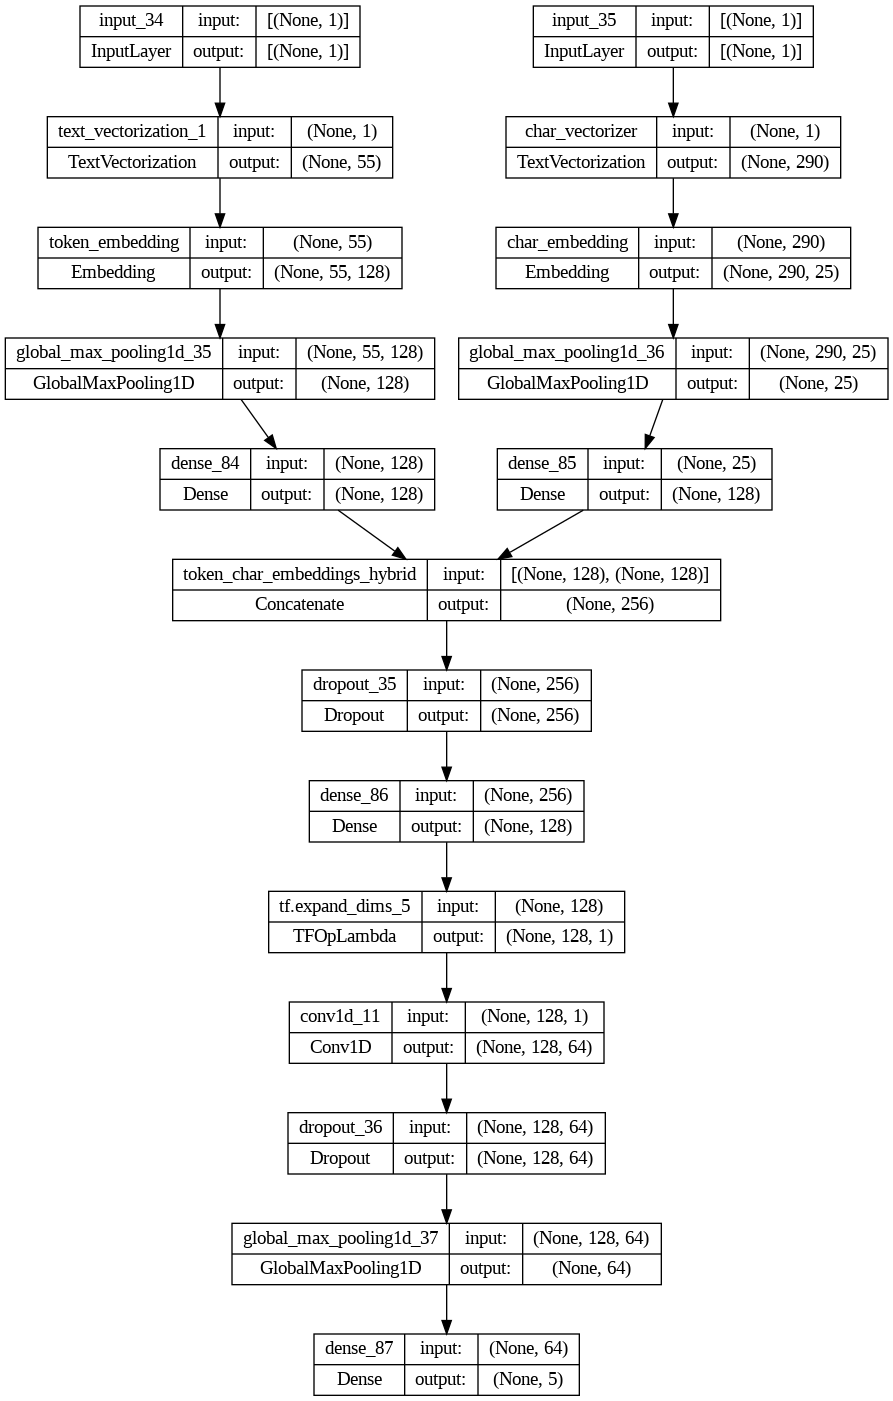

In [162]:
# Plot hybrid complex our own experimental model
from keras.utils import plot_model
plot_model(model_4_my_own_experiment,show_shapes=True)

In [163]:
# # Fit the model on tokens and chars
# history_model_4_my_own_experiment = model_4_my_own_experiment.fit(train_char_token_dataset,
#                                                                   steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
#                                                                   epochs = 3,
#                                                                   validation_data = val_char_token_dataset,
#                                                                   validation_steps = int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 74s 126ms/step - loss: 1.0200 - accuracy: 0.5558 - val_loss: 0.7859 - val_accuracy: 0.7188
Epoch 2/3
562/562 [==============================] - 71s 126ms/step - loss: 0.6655 - accuracy: 0.7450 - val_loss: 0.7227 - val_accuracy: 0.7460
Epoch 3/3
562/562 [==============================] - 70s 125ms/step - loss: 0.6023 - accuracy: 0.7695 - val_loss: 0.6970 - val_accuracy: 0.7610


In [165]:
# Evaluate on whole validation dataset
# model_4_my_own_experiment.evaluate(val_char_token_dataset)
# 945/945 [==============================] - 6s 6ms/step - loss: 0.7009 - accuracy: 0.7643
# [0.7009354829788208, 0.7642658352851868]

#  seems like second best model after model_1 so far

945/945 [==============================] - 6s 6ms/step - loss: 0.7009 - accuracy: 0.7643


[0.7009354829788208, 0.7642658352851868]